# Milestone 2 Phase 1

**Name: Prabaningrum Hendraswari Buditjahjono**

**Batch: 001-HCK**

**Background**

Currently, we have a dataset containing the characteristics of the people who has had a stroke and others who hasn't. From that data, we are trying to create a model that can possibly predict whether a person will have  stroke or not, based on the predetermined factors that each of the individuals have.

**Information**

1) gender: "Male", "Female" or "Other"
2) age: age of the patient
3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
4) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
5) ever_married: 0 if the patient has never married, 1 if the patient has married
6) worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 7) Residencetype: "Rural" or "Urban"
8) avg_glucose_level: average glucose level in blood
9) bmi: body mass index
10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
11) stroke: 1 if the patient had a stroke or 0 if not

Numerical Columns: age, avg_glucose_level, bmi

Categorical Columns: gender, hypertension, heart_disease, ever_married, worktype, smoking_status


Target: stroke

In [2]:
#Import Library

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef 
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
#Load data
df = pd.read_csv('brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


On preprocessing, we are going to have to do encoding to gender, marriage status, work type, residence type, and smoking status.

In [5]:
#for backup
df_c = df.copy()

## Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


From the initial checking, there seems to be no standard missing value detected among the data and all the data types fit each of the column. There are 3 numerical columns with the rest being categorical.

Numerical Columns: age, avg_glucose_level, bmi

Categorical Columns: gender, hypertension, heart_disease, ever_married, worktype, smoking_status

In [7]:
print("Unique Value: \n",df['gender'].unique())
print("Number of Unique Value: ", df['gender'].nunique())

Unique Value: 
 ['Male' 'Female']
Number of Unique Value:  2


In [8]:
print("Unique Value: \n",df['ever_married'].unique())
print("Number of Unique Value: ", df['ever_married'].nunique())

Unique Value: 
 ['Yes' 'No']
Number of Unique Value:  2


In [9]:
print("Unique Value: \n",df['work_type'].unique())
print("Number of Unique Value: ", df['work_type'].nunique())

Unique Value: 
 ['Private' 'Self-employed' 'Govt_job' 'children']
Number of Unique Value:  4


In [10]:
print("Unique Value: \n",df['Residence_type'].unique())
print("Number of Unique Value: ", df['Residence_type'].nunique())

Unique Value: 
 ['Urban' 'Rural']
Number of Unique Value:  2


In [11]:
print("Unique Value: \n",df['smoking_status'].unique())
print("Number of Unique Value: ", df['smoking_status'].nunique())

Unique Value: 
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Number of Unique Value:  4


c:\Users\praba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

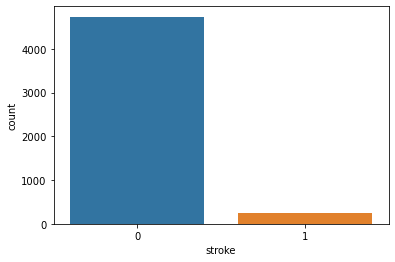

In [12]:
sns.countplot(df['stroke'])

In [13]:
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

From the analysis done above, it's known that the data is VERY imbalanced with a ratio of approximately 20:1 since the patient who has had a stroke are consisting of 248 people and the people who didn't have a stroke are 4733 people. This is going to impact the model performance itself. Therefore, we are going to do balancing later on in the notebook by doing oversampling with SMOTENC since the data has both categorical and numerical columns.

Other than that, from the checking of the unique values of the categorical columns, it is known that each of them has expected input except for smoking_status where there is an unknown label. This might be due to the surveyer not being able to trace, determine, or get the information whether the person smokes or not, or perhaps whether the patient is a former smoker.

**Correlation of the numerical columns**

<AxesSubplot:>

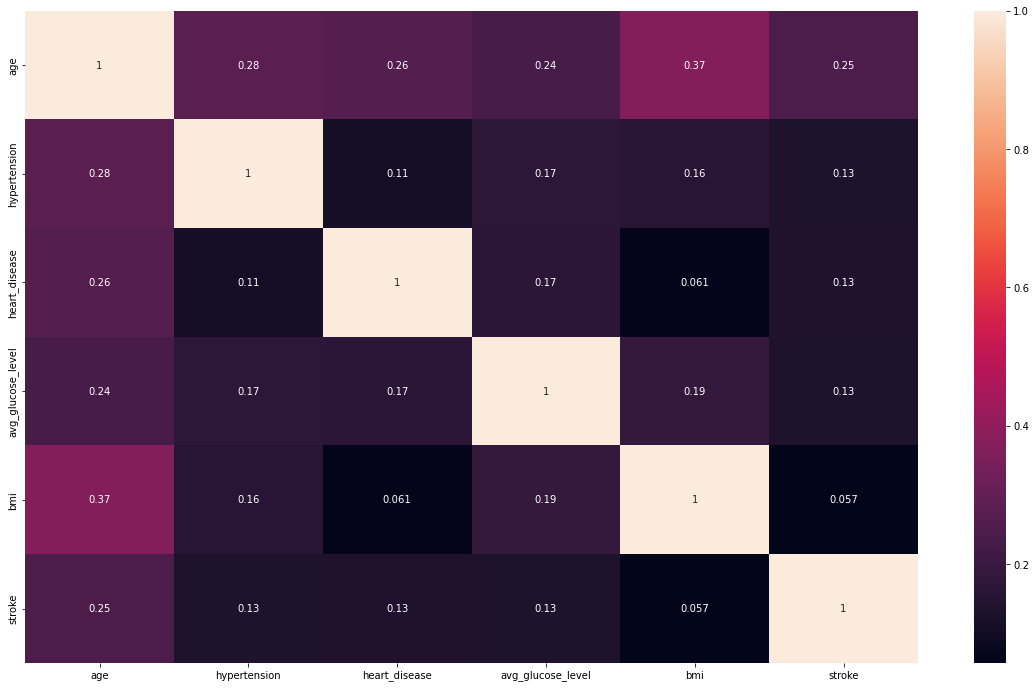

In [14]:
#making heatmap
corrlation= df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corrlation, annot = True)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74
bmi,4981.0,28.498173,6.790464,14.00,23.70,28.10,32.60,48.90
stroke,4981.0,0.049789,0.217531,0.00,0.00,0.00,0.00,1.00


From the heatmap and the description of the numerical data, it seems that most of them has a small correlation with whether a person has had a stroke or not. The age column has the highest correlation with stroke at 0.25, followed by avg_glucose_level at 0.3, and lastly bmi at 0.057


Other than that, the numerical data of the dataset also doesn't have any abnormalities by looking at the mean, standard deviation, quartile, min, and max score. Though in this case, some of the categorical data is still included due to it being encoded in the raw data earned by the author.

**Patterns of the categorical columns**

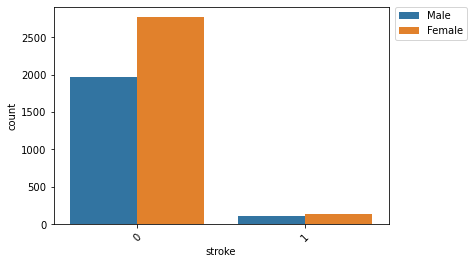

In [16]:
sns.countplot(x='stroke',data=df, hue= 'gender')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)
plt.show()

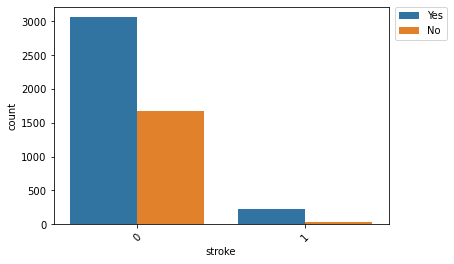

In [17]:
sns.countplot(x='stroke',data=df, hue= 'ever_married')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)
plt.show()

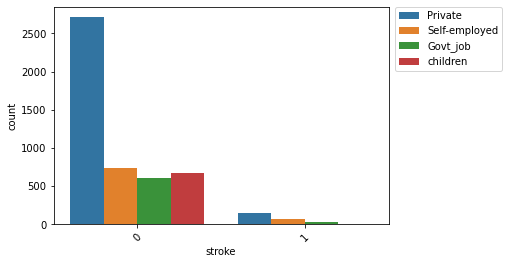

In [18]:
sns.countplot(x='stroke',data=df, hue= 'work_type')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)
plt.show()

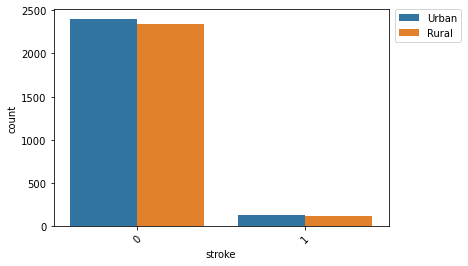

In [19]:
sns.countplot(x='stroke',data=df, hue= 'Residence_type')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)
plt.show()

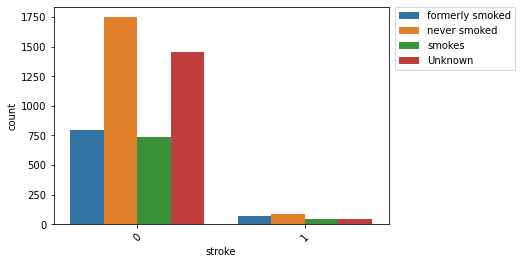

In [20]:
sns.countplot(x='stroke',data=df, hue= 'smoking_status')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)
plt.show()

If we look at the plots from the categorical columns, there seems to be either very little correlation between them and whether a patient has had a stroke or not, or that the data is so imbalanced that it's hard to identify whether there is an actual difference in attributes pattern between the patient who has had a stroke and the patient who hasn't had a stroke. Thus, it can be concluded that most likely, the difference that we can see on the plot between the 0 and 1 category on the stroke column is coincidentally due to the raw data itself.

## Splitting Data

In [21]:
#Data for inference
df_inf = df_c.sample(10, random_state=101)
#Remove inf data from df
df_train_test = df_c.drop(df_inf.index)
#Resetting index
df_train_test.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)

In [22]:
#Splitting the data to train and test
x = df_train_test.drop(columns='stroke')
y = df_train_test['stroke']

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=101, stratify=y)
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4411,Female,8.0,0,0,No,children,Rural,120.43,23.5,Unknown
380,Female,64.0,0,0,Yes,Private,Urban,82.34,31.9,never smoked
1649,Female,56.0,0,0,Yes,Self-employed,Urban,224.63,42.8,never smoked
4638,Male,30.0,0,0,No,Private,Urban,86.21,28.8,smokes
1376,Female,41.0,0,0,Yes,Private,Rural,104.36,30.2,never smoked
...,...,...,...,...,...,...,...,...,...,...
4919,Female,68.0,0,0,No,Private,Urban,82.85,29.0,smokes
3115,Male,61.0,0,0,Yes,Private,Rural,81.25,43.4,smokes
1849,Female,21.0,0,0,No,Private,Rural,93.00,25.7,never smoked
4238,Male,11.0,0,0,No,children,Urban,141.84,23.3,Unknown


## Feature Selection

From the exploration data analysis above, it can be known that since it's hard to tell whether there's a proper correlation between each of the columns to the target which is "stroke" since the numerical data has low correlation score and the categorical data's patterns not being able to be easily seen (probably due to the data imbalance), the author is deciding to use all of the columns for the model in order to attempt making an accurate model.

## Preprocessing Data

In [23]:
#Separating column and numerical data
x_train_num = x_train[['age','avg_glucose_level', 'bmi']]
x_test_num = x_test[['age','avg_glucose_level', 'bmi']]



**handling numerical data**

In [24]:
#defining function
def diagnostic_plots(x_train_num, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x_train_num[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=x_train_num[variable])
    plt.title('Boxplot')

    plt.show()

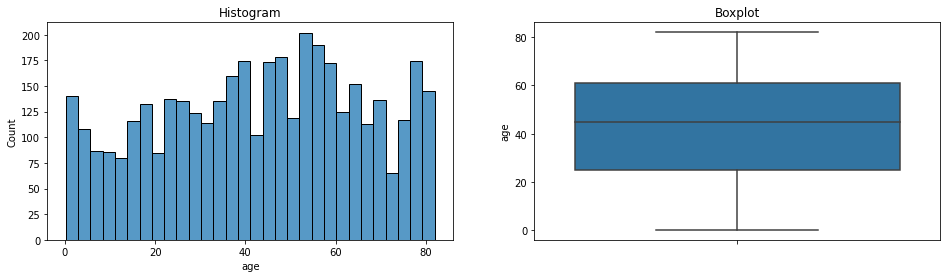

In [25]:
#checking outliers
diagnostic_plots(x_train_num, 'age')

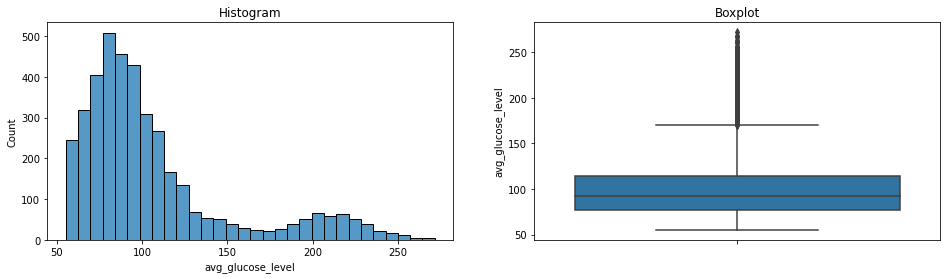

In [26]:
diagnostic_plots(x_train_num, 'avg_glucose_level')

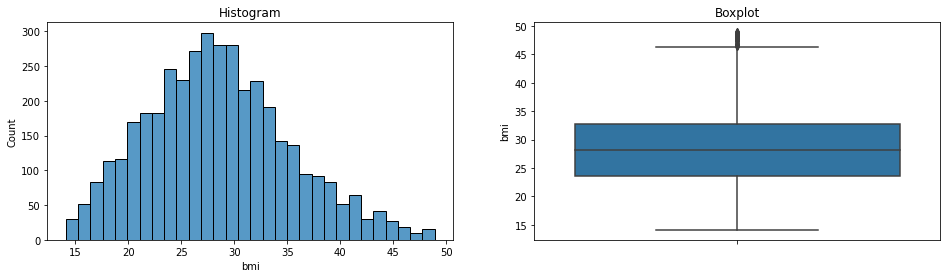

In [27]:
diagnostic_plots(x_train_num, 'bmi')

In [28]:
x_train_num.skew()

age                 -0.133719
avg_glucose_level    1.577886
bmi                  0.372257
dtype: float64

From the 3 columns of the numerical data, it is known that 2 of them (avg_glucose_level and bmi) has outliers, and one of them (avg_glucose_level) is skewed. Therefore, we are going to use capping to attempt solving the problem.

In [29]:
# Handling outlier with censoring method.
windsoriser = Winsorizer(capping_method='iqr',
                          tail='both', 
                          fold=1.5,
                          variables=['avg_glucose_level', 'bmi'])

windsoriser.fit(x_train_num)

x_train_win = windsoriser.transform(x_train_num)

In [30]:
#checking whether we have succeeded doing winsorizing
x_train_win.skew()

age                 -0.133719
avg_glucose_level    0.937922
bmi                  0.346811
dtype: float64

**scaling numerical data**

In [31]:
#Scaling

scaler = StandardScaler()
scaler.fit(x_train_win)

x_train_num_scaled = scaler.transform(x_train_win)
x_test_num_scaled = scaler.transform(x_test_num)

**encoding categorical data**

Categorical Columns: gender, hypertension, heart_disease, ever_married, worktype, smoking_status

Encoded columns: hypertension, heart_disease

To encode the data, ordinal is used since majority of the columns are categorical and if we did one hot encoding, it would produce too many columns for the model to process.

In [32]:
#determining the values to encode in order
gender_categories = ['Male', 'Female']
marriage_categories = ['Yes', 'No']
worktype_categories = ['Private', 'Self-employed', 'Govt_job', 'children']
smoking_categories = ['formerly smoked', 'never smoked', 'smokes',  'Unknown']

In [33]:
#resetting index
x_train_copy = x_train.copy()
x_test_copy = x_test.copy()
x_train_en = x_train.reset_index()
x_test_en = x_test.reset_index()

In [34]:
#encoding features with ordinal encoder
ordinal_encoder = OrdinalEncoder(categories = [gender_categories,marriage_categories,worktype_categories,smoking_categories])

x_train1 = ordinal_encoder.fit_transform(x_train_en[['gender','ever_married', 'work_type', 'smoking_status']])
x_train_fin = pd.DataFrame(x_train1, columns=['gender','ever_married', 'work_type', 'smoking_status'])
x_test1 = ordinal_encoder.transform(x_test_en[['gender','ever_married', 'work_type', 'smoking_status']])
x_test_fin = pd.DataFrame(x_test1, columns=['gender','ever_married', 'work_type', 'smoking_status'])
x_train_fin

,gender,ever_married,work_type,smoking_status
0,1.0,1.0,3.0,3.0
1,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,1.0
3,0.0,1.0,0.0,2.0
4,1.0,0.0,0.0,1.0
...,...,...,...,...
3971,1.0,1.0,0.0,2.0
3972,0.0,0.0,0.0,2.0
3973,1.0,1.0,0.0,1.0
3974,0.0,1.0,3.0,3.0


In [35]:
#combining with the column that has been encoded before
x_train_fin = pd.concat([x_train_fin,x_train_en[['hypertension', 'heart_disease']]],axis=1)
x_test_fin = pd.concat([x_test_fin,x_test_en[['hypertension', 'heart_disease']]],axis=1)
x_train_fin

,gender,ever_married,work_type,smoking_status,hypertension,heart_disease
0,1.0,1.0,3.0,3.0,0,0
1,1.0,0.0,0.0,1.0,0,0
2,1.0,0.0,1.0,1.0,0,0
3,0.0,1.0,0.0,2.0,0,0
4,1.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...
3971,1.0,1.0,0.0,2.0,0,0
3972,0.0,0.0,0.0,2.0,0,0
3973,1.0,1.0,0.0,1.0,0,0
3974,0.0,1.0,3.0,3.0,0,0


In [36]:
#combining with the numerical columns
x_train_final = np.concatenate([x_train_fin, x_train_num_scaled], axis=1)
x_test_final = np.concatenate([x_test_fin, x_test_num_scaled], axis=1)

In [37]:
x_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [38]:
x_train_final_df = pd.DataFrame(x_train_final,columns=[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'smoking_status', 'age','avg_glucose_level', 'bmi']])
x_test_final_df = pd.DataFrame(x_test_final,columns=[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'smoking_status', 'age','avg_glucose_level', 'bmi']])

**balancing data**

In [39]:
sm = SMOTENC(random_state=101, categorical_features=[0,1,2,3,4,5,6])

x_train_final_df, y_train = sm.fit_resample(x_train_final_df, y_train)

c:\Users\praba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

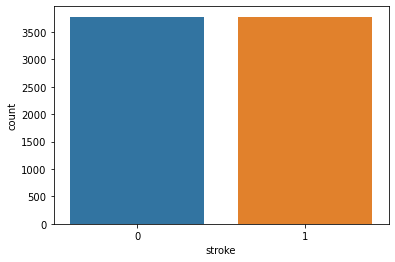

In [40]:
#checking the data after balancing
sns.countplot(y_train)

From the plot, it is known that we have succeeded doing oversampling towards the minority data at the train section by using SMOTENC.

## Modelling

**Logistic Regression**

In [41]:
log = LogisticRegression(max_iter=1000000, class_weight= {0:1,1:20}, random_state=101)
log.fit(x_train_final_df,y_train)

LogisticRegression(class_weight={0: 1, 1: 20}, max_iter=1000000,
                   random_state=101)

**Decision Tree**

In [42]:
dt = DecisionTreeClassifier(class_weight= {0:1,1:20}, random_state=101)
dt.fit(x_train_final_df,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 20}, random_state=101)

**Random Forest**

In [43]:
rf = RandomForestClassifier(class_weight= {0:1,1:20}, random_state=101)
rf.fit(x_train_final_df,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 20}, random_state=101)

**KNN**

In [44]:
knn = KNeighborsClassifier()
knn.fit(x_train_final_df,y_train)

KNeighborsClassifier()

**Naive Bayes**

In [45]:
nb = GaussianNB()
nb.fit(x_train_final_df,y_train)

GaussianNB()

## Cross Validation

In [46]:
#logistic regression
acc_train_cross_val = cross_val_score(log, 
                                      x_train_final_df, 
                                      y_train, 
                                      cv=3, scoring="matthews_corrcoef")

print('matthews_corrcoef - All - Cross Validation  : ', acc_train_cross_val)
print('matthews_corrcoef - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('matthews_corrcoef - Std - Cross Validation  : ', acc_train_cross_val.std())
print('matthews_corrcoef - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

matthews_corrcoef - All - Cross Validation  :  [0.46070141 0.44559577 0.44251786]
matthews_corrcoef - Mean - Cross Validation :  0.44960501495245797
matthews_corrcoef - Std - Cross Validation  :  0.007946315480100155
matthews_corrcoef - Range of Test-Set       :  0.4416586994723578 - 0.45755133043255813


In [47]:
#decision tree
acc_train_cross_val = cross_val_score(dt, 
                                      x_train_final_df, 
                                      y_train, 
                                      cv=3, scoring="matthews_corrcoef")

print('matthews_corrcoef - All - Cross Validation  : ', acc_train_cross_val)
print('matthews_corrcoef - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('matthews_corrcoef - Std - Cross Validation  : ', acc_train_cross_val.std())
print('matthews_corrcoef - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

matthews_corrcoef - All - Cross Validation  :  [0.73529045 0.76781329 0.76786695]
matthews_corrcoef - Mean - Cross Validation :  0.7569902266488239
matthews_corrcoef - Std - Cross Validation  :  0.015344076913068655
matthews_corrcoef - Range of Test-Set       :  0.7416461497357553 - 0.7723343035618925


In [48]:
#random forest
acc_train_cross_val = cross_val_score(rf, 
                                      x_train_final_df, 
                                      y_train, 
                                      cv=3, scoring="matthews_corrcoef")

print('matthews_corrcoef - All - Cross Validation  : ', acc_train_cross_val)
print('matthews_corrcoef - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('matthews_corrcoef - Std - Cross Validation  : ', acc_train_cross_val.std())
print('matthews_corrcoef - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

matthews_corrcoef - All - Cross Validation  :  [0.83752957 0.86722363 0.86105055]
matthews_corrcoef - Mean - Cross Validation :  0.8552679156450148
matthews_corrcoef - Std - Cross Validation  :  0.012793580177563131
matthews_corrcoef - Range of Test-Set       :  0.8424743354674517 - 0.868061495822578


In [49]:
#knn
acc_train_cross_val = cross_val_score(knn, 
                                      x_train_final_df, 
                                      y_train, 
                                      cv=3, scoring="matthews_corrcoef")

print('matthews_corrcoef - All - Cross Validation  : ', acc_train_cross_val)
print('matthews_corrcoef - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('matthews_corrcoef - Std - Cross Validation  : ', acc_train_cross_val.std())
print('matthews_corrcoef - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

matthews_corrcoef - All - Cross Validation  :  [0.73855818 0.77156389 0.76943329]
matthews_corrcoef - Mean - Cross Validation :  0.7598517873425129
matthews_corrcoef - Std - Cross Validation  :  0.015081954548136847
matthews_corrcoef - Range of Test-Set       :  0.744769832794376 - 0.7749337418906498


In [50]:
#naive bayes
acc_train_cross_val = cross_val_score(nb, 
                                      x_train_final_df, 
                                      y_train, 
                                      cv=3, scoring="matthews_corrcoef")

print('matthews_corrcoef - All - Cross Validation  : ', acc_train_cross_val)
print('matthews_corrcoef - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('matthews_corrcoef - Std - Cross Validation  : ', acc_train_cross_val.std())
print('matthews_corrcoef - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

matthews_corrcoef - All - Cross Validation  :  [0.50700765 0.5375934  0.55370373]
matthews_corrcoef - Mean - Cross Validation :  0.5327682592854761
matthews_corrcoef - Std - Cross Validation  :  0.019366505046376745
matthews_corrcoef - Range of Test-Set       :  0.5134017542390994 - 0.5521347643318528


From the Matthews correlation coefficient scores, it seems that random forest model works best. Therefore, we are going to use it from this point onward, including when we do inference.

## Grid Search

In [51]:
#input parameters
param_grid_rf = {'n_estimators': [10,50,100,200],
    'criterion':['gini', 'entropy'],
    'max_depth': [2,3,4,5,6],
    'min_samples_split': [2,4,6]}

param_grid_rf

{'n_estimators': [10, 50, 100, 200],
 'criterion': ['gini', 'entropy'],
 'max_depth': [2, 3, 4, 5, 6],
 'min_samples_split': [2, 4, 6]}

In [52]:
#fitting the grid search
rf_grid = GridSearchCV(RandomForestClassifier(),param_grid_rf)
rf_grid.fit(x_train_final_df, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]})

In [53]:
#showing the best parameters
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_split': 2,
 'n_estimators': 50}

In [54]:
#defining the best parameters to be used later
rf_best = rf_grid.best_estimator_
rf_best

RandomForestClassifier(max_depth=6, n_estimators=50)

## Model Evaluation

In [55]:
#before tuning
y_train_pred = rf.predict(x_train_final_df)
y_test_pred = rf.predict(x_test_final_df)

print("="*10,"TRAINING","="*10)
print(classification_report(y_train,y_train_pred,zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test,y_test_pred,zero_division=0))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3781
           1       1.00      1.00      1.00      3781

    accuracy                           1.00      7562
   macro avg       1.00      1.00      1.00      7562
weighted avg       1.00      1.00      1.00      7562



========== TEST ==========
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       946
           1       0.17      0.35      0.23        49

    accuracy                           0.89       995
   macro avg       0.57      0.63      0.58       995
weighted avg       0.93      0.89      0.90       995



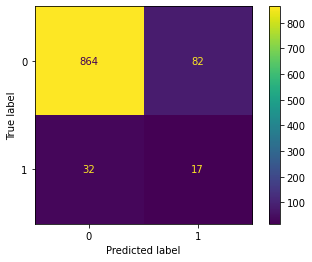

In [56]:
cm = confusion_matrix(y_test, y_test_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)

disp.plot()
plt.show()

In [57]:
#before tuning
y_train_pred_best = rf_best.predict(x_train_final_df)
y_test_pred_best = rf_best.predict(x_test_final_df)

print("="*10,"TRAINING","="*10)
print(classification_report(y_train,y_train_pred_best,zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test,y_test_pred_best,zero_division=0))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      3781
           1       0.82      0.90      0.86      3781

    accuracy                           0.85      7562
   macro avg       0.86      0.85      0.85      7562
weighted avg       0.86      0.85      0.85      7562



========== TEST ==========
              precision    recall  f1-score   support

           0       0.98      0.77      0.87       946
           1       0.14      0.73      0.24        49

    accuracy                           0.77       995
   macro avg       0.56      0.75      0.55       995
weighted avg       0.94      0.77      0.83       995



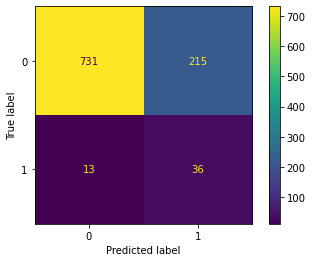

In [58]:
cm = confusion_matrix(y_test, y_test_pred_best, labels=rf_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_best.classes_)

disp.plot()
plt.show()

From the evaluation, it is known that the model performs terribly at predicting whether a person will have a stroke or not based off of their predetermined conditions. Although the model after tuning seems to perform bit better, it's still really bad at achieving our purpose and the model is overfit. The final model only successfully predict 36 people who has had a stroke, and wrongly predicted 13 of them. This could be dangerous if the model is actually used in reality since there would be a lack of medical treatment that might be able to mitigate the stroke in a patient.

The author has also already tried to use cost sensitive learning and changing the parameters manually, though the result isn't changing much.

## Inference

In [59]:
df_inf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,23.0,0,0,No,Private,Rural,79.33,41.5,never smoked,0
1,Male,51.0,0,0,Yes,Private,Rural,77.07,32.1,formerly smoked,0
2,Male,4.0,0,0,No,children,Urban,94.23,16.2,Unknown,0
3,Female,50.0,0,0,Yes,Private,Rural,82.10,26.4,Unknown,0
4,Female,63.0,0,0,Yes,Govt_job,Rural,106.58,23.9,Unknown,1


In [60]:
df_inf_x = df_inf.drop(columns=['stroke','Residence_type'])

In [61]:
num_col = ['age', 'avg_glucose_level', 'bmi']
cat_col = ['gender','hypertension', 'heart_disease', 'ever_married', 'work_type', 'smoking_status']

In [62]:
# num_col = ['age', 'avg_glucose_level', 'bmi']
# cat_col = ['gender', 'ever_married', 'work_type', 'smoking_status']

In [100]:

num_pipe = Pipeline([
    ('scaling',StandardScaler())
])

cat_pipe = Pipeline([
    ('encode',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=5))
])

preprocess = ColumnTransformer([
    ('num',num_pipe,num_col),
    ('cat',cat_pipe,cat_col)]
)

pipe = Pipeline([('preprocessing', preprocess), ('classifier', RandomForestClassifier())])

In [101]:
x_train_final_df.columns=x_train_final_df.columns.get_level_values(0)
x_train_pipe = x_train_final_df.copy()
x_train_pipe[num_col] = scaler.inverse_transform(x_train_pipe[num_col])
tmp = x_train_pipe['work_type']
x_train_pipe['work_type'] = x_train_pipe['ever_married']
x_train_pipe['ever_married'] = tmp
x_train_pipe[['gender','ever_married','work_type','smoking_status']] = ordinal_encoder.inverse_transform(x_train_pipe[['gender','ever_married','work_type','smoking_status']])
pipe.fit(x_train_pipe,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=5))]),
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'ever_married', 'work_type',
                                                   'smoking_status'])])),
                ('classifier', RandomForestClassifier())])

## Inference

In [91]:
df_inf_x

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
0,Female,23.0,0,0,No,Private,79.33,41.5,never smoked
1,Male,51.0,0,0,Yes,Private,77.07,32.1,formerly smoked
2,Male,4.0,0,0,No,children,94.23,16.2,Unknown
3,Female,50.0,0,0,Yes,Private,82.10,26.4,Unknown
4,Female,63.0,0,0,Yes,Govt_job,106.58,23.9,Unknown
5,Male,78.0,0,0,Yes,Private,74.70,28.8,formerly smoked
6,Female,24.0,0,0,No,Private,71.63,22.0,formerly smoked
7,Male,79.0,1,0,Yes,Private,75.02,29.1,never smoked
8,Female,70.0,0,0,Yes,Self-employed,76.34,24.4,formerly smoked
9,Female,79.0,0,1,Yes,Private,127.29,27.7,never smoked


In [102]:
pipe.predict(df_inf_x)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

## Conclusion

From the initial data exploration, it is found that the dataset has around 4000 entries with no missing values, though the data is hugely imbalanced between those who has had a stroke and who did not. 

Based off of the categorical attributes of the patient, it is difficult to see whether there is or isn't any pattern that can predict whether a person has already had a stroke or not. On top of that, the correlation between the numerical columns and the target is small. Therefore, the author decided to use all of the columns for the model. 

To handle the imbalance data and in an effort to improve the model performance, oversampling is done to the minority data. 

From the performance of several models, it is found that random forest did the best among the others and thus we are using that specific model regarding this data. After finding the best parameters and tuning the model, it is found that the performance is improved although still struggling to predict the patient having a stroke successfully. Therefore, it could not be used in reality yet. 

For further improvement, perhaps the surveyer could try to obtain more data and for the model itself, we could experiment with the hyperparameters and do more grid search to find a more optimal result from the data.